# CONFIGURAÇÃO E PREPARAÇÃO DO AMBIENTE



Para o desenvolvimento da base de dados, tem a necessidade da instalação de algumas ferramentas:

dfply - Facilitador de manipulação de dataframes:
https://github.com/kieferk/dfplyt

yellowbrick - Visualizador de modelos preditivos:
https://www.scikit-yb.org

In [2]:
# Instalação dos modulos via pip install (na maquina virtual - conteiner):
!pip install dfply

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.4/612.4 kB 6.5 MB/s eta 0:00:00


In [3]:
# Utilização e importação de libs complementares:
from logging import warning
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import rc # Confg add para graficos a serem gerados

# Define o estilo de grafico - https://matplotlib.org/3.1.1/gallery/#style-sheets
plt.style.use("fivethirtyeight")

# Formatação das imagens:
%config InlineBackend.figure_format = 'retina'

# Formatação das Fontes:
rc('font',**{'family':'sans-serif','sans-serif':['DejaVu Sans'], 'size':12})
rc('mathtext',**{'default':'regular'})

# Definição da semente de aleatoriedade a ser utilizada:
np.random.seed(42)

# Solicitação para ignorar todos os Warnings emitidos pelo Python:
import warnings
warnings.filterwarnings('ignore')

# Importação dos comandos da lib dfply
from dfply import *


# BASE DE DADOS


Apos o ambiente preparado e configuração, vamos realizar a regressão dos dados:


In [4]:
# Importação da funcionalidade de Split (criar a base de dados):
from sklearn.model_selection import train_test_split

Importação do conjunto de dados com o Pandas DataFrame


In [5]:
URL = "https://raw.githubusercontent.com/profviniciusheltai/Aula_IA/main/Projeto06.csv"
banco = pd.read_csv(URL, sep=";")

# Demonstração das informações obtidas (info):
banco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5565 entries, 0 to 5564
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   cod_municipio          5565 non-null   int64  
 1   PopResid               5565 non-null   int64  
 2   ExpecVida              5565 non-null   float64
 3   idoso                  5565 non-null   float64
 4   mulher                 5565 non-null   float64
 5   nascimentopercapta     5565 non-null   float64
 6   casado                 5565 non-null   float64
 7   evangelico             5565 non-null   float64
 8   deficiente             5565 non-null   float64
 9   densidadepop           5565 non-null   float64
 10  geladeira              5565 non-null   float64
 11  moradorfavela          5565 non-null   float64
 12  pavimentacao           5565 non-null   float64
 13  brancos                5565 non-null   float64
 14  nvelsuperiorconcludo   5565 non-null   float64
 15  conc

Selecionando os Municipios com mais de 10mil Habitantes:

In [6]:
# Usando o comando mask e select da lib dfply para filtrar o conjunto de dados:
bancoFiltrado = banco >> mask(X.PopResid > 10000) >> select(~X.PopResid)

# Configuração de exibição em ser notação cientifica:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Estatistica basica do conjunto de dados:
bancoFiltrado.describe()


,cod_municipio,ExpecVida,idoso,mulher,nascimentopercapta,casado,evangelico,deficiente,densidadepop,geladeira,...,nvelsuperiorconcludo,conclusoensinomdio,ResideMenos10anos,resideoutranacionalid,taxadedesemprego,taxatrabinfantil,horastrabalho,Gini,CobBFamilia,traboutromun
count,3052.000,3052.000,3052.000,3052.000,3052.000,3052.000,3052.000,3052.000,3052.000,3052.000,...,3052.000,3052.000,3052.000,3052.000,3052.000,3052.000,3052.000,3052.000,3052.000,3052.000
mean,3116082.477,72.979,11.049,49.878,14.982,34.256,18.297,24.188,177.007,87.488,...,6.027,17.576,5.631,0.087,4.200,11.873,28.093,0.520,72.489,10.662
std,963249.105,2.778,2.855,1.414,3.303,8.097,9.159,4.128,764.841,12.259,...,3.893,6.582,4.562,0.250,1.852,6.138,9.339,0.061,19.627,10.616
min,1100015.000,65.550,2.627,38.710,5.970,6.550,2.030,10.190,0.200,27.980,...,0.410,1.860,0.067,0.000,0.348,0.840,3.450,0.305,0.000,0.000
25%,2501881.250,70.850,9.107,49.127,12.728,29.043,11.040,21.317,16.108,80.465,...,3.110,12.490,2.860,0.000,2.936,7.330,22.235,0.480,60.540,3.990
50%,3109808.000,73.260,11.133,50.040,14.535,35.115,17.260,24.065,36.060,91.570,...,5.070,16.640,4.432,0.020,3.916,10.590,28.005,0.518,77.040,6.980
75%,3548527.250,75.220,13.093,50.820,16.780,40.610,24.453,26.880,87.293,97.560,...,7.982,21.930,6.894,0.090,5.161,15.043,33.907,0.559,86.655,13.085
max,5300108.000,78.640,20.404,54.240,35.170,53.420,77.260,38.790,13024.600,100.000,...,33.840,47.470,45.749,5.730,16.987,63.220,63.600,0.808,100.000,65.040


In [7]:
# Demonstração das informações da base obtida (info):
bancoFiltrado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3052 entries, 0 to 5564
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   cod_municipio          3052 non-null   int64  
 1   ExpecVida              3052 non-null   float64
 2   idoso                  3052 non-null   float64
 3   mulher                 3052 non-null   float64
 4   nascimentopercapta     3052 non-null   float64
 5   casado                 3052 non-null   float64
 6   evangelico             3052 non-null   float64
 7   deficiente             3052 non-null   float64
 8   densidadepop           3052 non-null   float64
 9   geladeira              3052 non-null   float64
 10  moradorfavela          3052 non-null   float64
 11  pavimentacao           3052 non-null   float64
 12  brancos                3052 non-null   float64
 13  nvelsuperiorconcludo   3052 non-null   float64
 14  conclusoensinomdio     3052 non-null   float64
 15  ResideMen

Separar conjunto de dados em treinamento e teste:

In [8]:
#Variaveis de treinamento:
outcome = bancoFiltrado >> select(X.ExpecVida)

# Remove a coluna ExpecVida do conjunto de dados (axis=1 representa coluna)
# Inplace é para gerar a variavel
bancoFiltrado.drop(['ExpecVida'], axis=1, inplace=True)

In [9]:
# Fazendo a separação do conjunto de dados em treino, teste com 30%
treino_x, teste_x, treino_y, teste_y = train_test_split(bancoFiltrado, outcome, test_size=0.3)

# Demonstração da quantidade de registro para treino:
treino_x.shape

(2136, 22)

In [10]:
# Demonstração da quantidade de registro para teste:
teste_x.shape

(916, 22)

# PRE-PROCESSAMENTO DOS DADOS DE TREINO

Variaveis Quantitativas:


In [11]:
# Cria uma função para determinar o tipo de variavel:
def get_column_datatype(df):

  dtype = {}

  for idx in df.columns.values:
    dt = df[idx].dtype
    dtype[idx] = dt

  ctr = pd.DataFrame([dtype]).T
  ctr_2 = ctr.rename(columns={0: "datatype"})
  return ctr_2

In [12]:
get_column_datatype(treino_x)

,datatype
cod_municipio,int64
idoso,float64
mulher,float64
nascimentopercapta,float64
casado,float64
evangelico,float64
deficiente,float64
densidadepop,float64
geladeira,float64
moradorfavela,float64


In [13]:
# Removendo o conjunto de dados a variavel cod_municipio
treino_x = treino_x >> select(~X.cod_municipio)
teste_x = teste_x >> select(~X.cod_municipio)

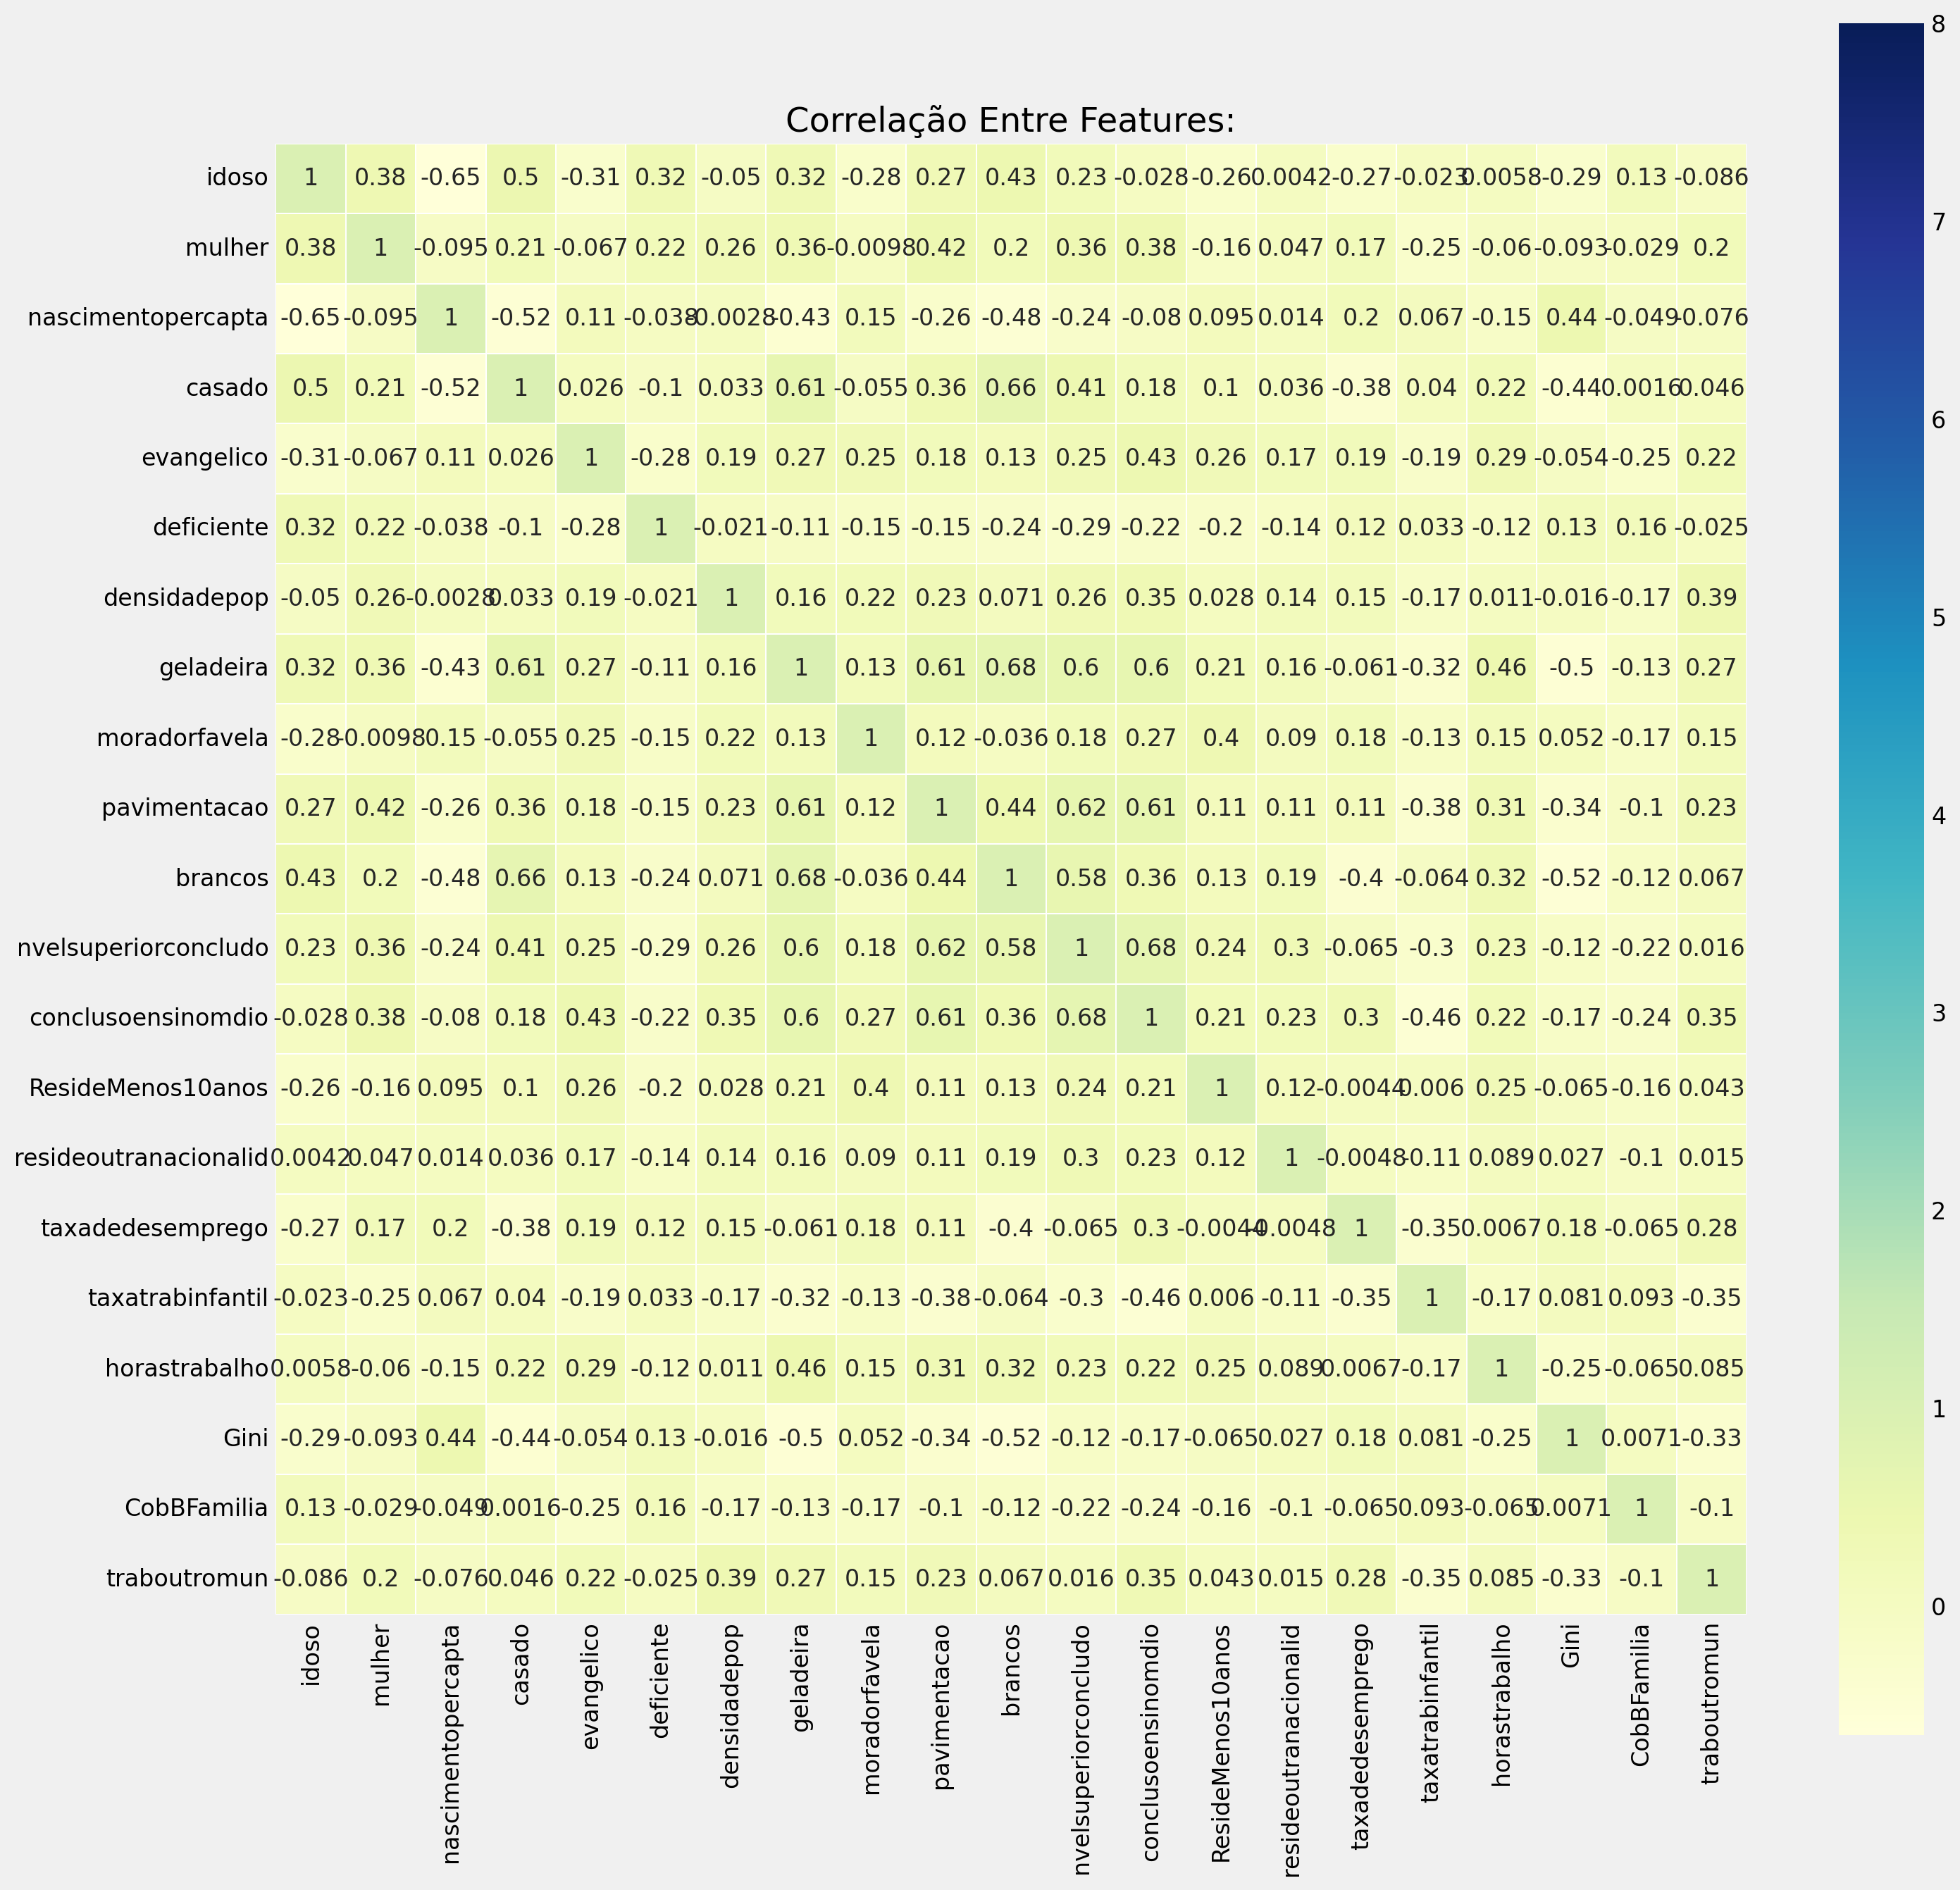

In [14]:
# Verificando a correlação entre as variaveis:

# Metodo de Pearson:
corr = treino_x.corr(method='pearson')

# Plotando o tamanho da figura:
plt.figure(figsize=(15,15))
sns.heatmap(corr, vmax=8, linewidths=0.01,
            square=True, annot=True, cmap='YlGnBu', linecolor='white')
plt.title("Correlação Entre Features:")
plt.show()

Avaliar Assimetria

In [15]:
from scipy.stats import skew
skewed_feats = treino_x.apply(lambda x: skew(x.dropna()))
print(skewed_feats.sort_values(ascending=False))

resideoutranacionalid   10.392
densidadepop             9.867
moradorfavela            6.849
ResideMenos10anos        3.038
traboutromun             2.282
nvelsuperiorconcludo     1.685
taxatrabinfantil         1.317
nascimentopercapta       1.052
taxadedesemprego         0.980
evangelico               0.669
brancos                  0.521
conclusoensinomdio       0.507
pavimentacao             0.201
Gini                     0.195
deficiente               0.131
horastrabalho            0.112
idoso                   -0.090
casado                  -0.504
CobBFamilia             -0.887
mulher                  -1.226
geladeira               -1.274
dtype: float64


In [16]:
# Importando a função VarianceThreshold
from sklearn.feature_selection import VarianceThreshold

constant_features = [
    feat for feat in treino_x.columns if treino_x[feat].std() == 0
]

constant_features

[]

Padronização dos dados de treino e teste

In [17]:
# Importação da função StandardScaler para padronizar dados:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

# Obtendo as estastiticas necessarias para a padronização a partir do conjunto de treinamento
sc.fit(treino_x)


StandardScaler()

In [18]:
sc.mean_

array([1.10561543e+01, 4.98942837e+01, 1.49378184e+01, 3.42582303e+01,
       1.82862219e+01, 2.42233287e+01, 1.81528408e+02, 8.75928324e+01,
       1.64096442e-01, 4.90191217e-01, 4.34871980e+01, 6.06676966e+00,
       1.76000234e+01, 5.67030998e+00, 9.04447566e-02, 4.18480011e+00,
       1.18368539e+01, 2.82110627e+01, 5.19769569e-01, 7.21900001e+01,
       1.06729728e+01])

In [19]:
sc.var_

array([8.09619436e+00, 2.04428628e+00, 1.04890282e+01, 6.47029621e+01,
       8.26843722e+01, 1.66546761e+01, 5.83174730e+05, 1.46619610e+02,
       1.46157517e-01, 5.81145837e-02, 5.22026125e+02, 1.56467106e+01,
       4.18157665e+01, 2.12401665e+01, 7.31295307e-02, 3.31229428e+00,
       3.67994759e+01, 8.64506828e+01, 3.63776334e-03, 3.92491316e+02,
       1.13289150e+02])

In [20]:
# Padronizando o conjunto de treinamento
treino_x = pd.DataFrame(sc.transform(treino_x), columns=treino_x.columns)

In [21]:
# Padronizando o conjunto de testes
teste_x = pd.DataFrame(sc.transform(teste_x), columns=teste_x.columns)

In [22]:
# Imprimindo para confirmar:
treino_x.head()

,idoso,mulher,nascimentopercapta,casado,evangelico,deficiente,densidadepop,geladeira,moradorfavela,pavimentacao,...,nvelsuperiorconcludo,conclusoensinomdio,ResideMenos10anos,resideoutranacionalid,taxadedesemprego,taxatrabinfantil,horastrabalho,Gini,CobBFamilia,traboutromun
0,-0.288,0.536,0.242,-1.037,-1.180,0.323,-0.171,0.043,-0.429,-0.396,...,-0.391,-0.871,-0.416,-0.334,0.429,-0.806,-0.144,0.022,0.515,-0.137
1,-0.149,-0.248,0.316,-0.516,-1.095,0.830,-0.217,-0.279,-0.429,-0.150,...,-0.644,-0.598,-0.848,-0.224,-0.792,-0.774,-1.468,0.703,-0.695,-0.672
2,-0.076,-0.017,0.038,1.215,2.732,0.418,-0.165,0.755,0.669,-0.987,...,-0.578,-0.199,0.113,-0.334,-0.022,-0.657,1.124,-0.925,-0.262,0.448
3,0.033,0.508,-0.478,-0.350,-0.790,-0.672,-0.212,-1.712,0.251,-1.139,...,-0.692,-1.498,-0.421,-0.076,-0.778,-0.059,-1.081,0.707,-1.307,-0.494
4,0.347,-1.234,-0.126,-0.749,0.285,0.249,-0.235,0.528,-0.220,-0.572,...,0.446,0.156,-0.179,0.072,-0.174,-0.679,2.057,-0.290,-0.167,-0.550


In [23]:
teste_x.head()

,idoso,mulher,nascimentopercapta,casado,evangelico,deficiente,densidadepop,geladeira,moradorfavela,pavimentacao,...,nvelsuperiorconcludo,conclusoensinomdio,ResideMenos10anos,resideoutranacionalid,taxadedesemprego,taxatrabinfantil,horastrabalho,Gini,CobBFamilia,traboutromun
0,-0.449,-1.451,1.304,-0.477,0.084,0.362,-0.229,0.173,-0.429,-1.056,...,-0.414,-0.564,0.780,-0.150,-0.642,-0.021,-1.375,0.218,0.536,-0.603
1,0.391,-0.213,-0.802,-0.334,-0.191,1.763,-0.198,0.008,-0.089,-1.098,...,-0.646,-0.421,-0.510,-0.002,-0.270,-0.440,-0.213,0.677,-0.463,-0.448
2,-1.148,-1.157,1.236,-0.626,-0.907,0.058,-0.236,-1.036,-0.429,-0.921,...,-0.507,-0.251,0.398,0.035,1.387,-0.257,-1.047,1.556,0.558,-0.709
3,0.537,1.095,0.137,0.813,-1.712,1.886,-0.183,-0.294,-0.429,0.053,...,-0.576,-1.239,0.851,-0.334,0.004,2.096,-1.438,-0.038,-0.027,-0.078
4,0.930,0.165,-0.518,1.056,-0.327,-0.158,-0.185,0.924,-0.429,1.206,...,1.050,0.281,-0.791,-0.334,-0.582,-0.545,0.558,-1.114,-0.683,-0.562


# REGRESSÃO LINEAR


In [24]:
# Importando o modelo de Regressão Linear
from sklearn.linear_model import LinearRegression

# Importando as metricas de avaliação
from sklearn.metrics import r2_score, mean_squared_error
import operator

lr = LinearRegression()

In [25]:
# CONHECIMENTO EXTRA: Pedido de Ajuda:
help(LinearRegression())

Help on LinearRegression in module sklearn.linear_model._base object:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, copy_X=True, n_jobs=None, positive=False)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  copy_X : bool, default=True
 |      If True, X will be copied; else, it may be overwritten.
 |  
 |  n_jobs : int, default=None
 |      The number of jobs to use for the computation. This will only provide
 | 

In [26]:
# TREINAMENTO:

# Ajustando o modelo aos dados de treinamento:
lr.fit(treino_x, treino_y)

LinearRegression()

In [27]:
# TESTE:

# Avaliando o desempenho do modelo:
pred_treino_lr = lr.predict(treino_x)
pred_teste_lr = lr.predict(teste_x)
# Exibe resultado:
print("RESULTADO - TREINOS:")
print('RMSE (treino):', np.sqrt(mean_squared_error(treino_y, pred_treino_lr)))
print('R^2 (treino) :', r2_score(treino_y, pred_treino_lr))
print("RESULTADO - TESTE:")
print('RMSE (teste):', np.sqrt(mean_squared_error(teste_y, pred_teste_lr)))
print('R^2 (teste) :', r2_score(teste_y, pred_teste_lr))
print('------------------------------')

RESULTADO - TREINOS:
RMSE (treino): 1.4604923330002504
R^2 (treino) : 0.725510160532077
RESULTADO - TESTE:
RMSE (teste): 1.4430575194808577
R^2 (teste) : 0.7253642096022482
------------------------------


 PROJETO FEITO ACIMA NA AULA 20/04 - CONTINUA NA PROX AULA

Exibindo os valores dos coeficientes:

In [28]:
eq = "y_pred = " + str(lr.intercept_[0]) + "\n"

for c, coef in sorted(zip(treino_x.columns, lr.coef_.ravel()),
                      key=operator.itemgetter(1), reverse=True):
  print(f'{c} = {coef}')
  eq = eq + (" + " if coef > 0 else " ") + str(coef) + "*" + str(c) + "\n"

brancos = 0.5952753091097063
nvelsuperiorconcludo = 0.5901947493813409
conclusoensinomdio = 0.5449584744356267
geladeira = 0.33939697996651075
horastrabalho = 0.28807857207026644
casado = 0.2725760845472862
evangelico = 0.22588490343591758
pavimentacao = 0.14079636148279792
moradorfavela = 0.08726952833408567
taxatrabinfantil = 0.07042364387785743
resideoutranacionalid = 0.02666333057777955
ResideMenos10anos = 0.010126772074062101
Gini = -0.015488050860879413
traboutromun = -0.018350487100619796
idoso = -0.02463125479382608
densidadepop = -0.041075754681657806
taxadedesemprego = -0.04588812333818604
CobBFamilia = -0.10897966805789545
mulher = -0.23921350171635178
deficiente = -0.30170331162080705
nascimentopercapta = -0.30879905955404513


CONCLUSÃO / ANALISE SOBRE O RESULTADO:

- sdsdsdsdsdsd
- dsdsdsdsdsdsd
- sdsdsdsdsdsdsd
- sdsdsdsdsdsdsd


In [29]:
lr.intercept_

array([72.99965824])

In [30]:
# Visualização da Equação Completa:
print(eq)

y_pred = 72.99965823970037
 + 0.5952753091097063*brancos
 + 0.5901947493813409*nvelsuperiorconcludo
 + 0.5449584744356267*conclusoensinomdio
 + 0.33939697996651075*geladeira
 + 0.28807857207026644*horastrabalho
 + 0.2725760845472862*casado
 + 0.22588490343591758*evangelico
 + 0.14079636148279792*pavimentacao
 + 0.08726952833408567*moradorfavela
 + 0.07042364387785743*taxatrabinfantil
 + 0.02666333057777955*resideoutranacionalid
 + 0.010126772074062101*ResideMenos10anos
 -0.015488050860879413*Gini
 -0.018350487100619796*traboutromun
 -0.02463125479382608*idoso
 -0.041075754681657806*densidadepop
 -0.04588812333818604*taxadedesemprego
 -0.10897966805789545*CobBFamilia
 -0.23921350171635178*mulher
 -0.30170331162080705*deficiente
 -0.30879905955404513*nascimentopercapta



In [31]:
y_pred = lr.predict(teste_x)

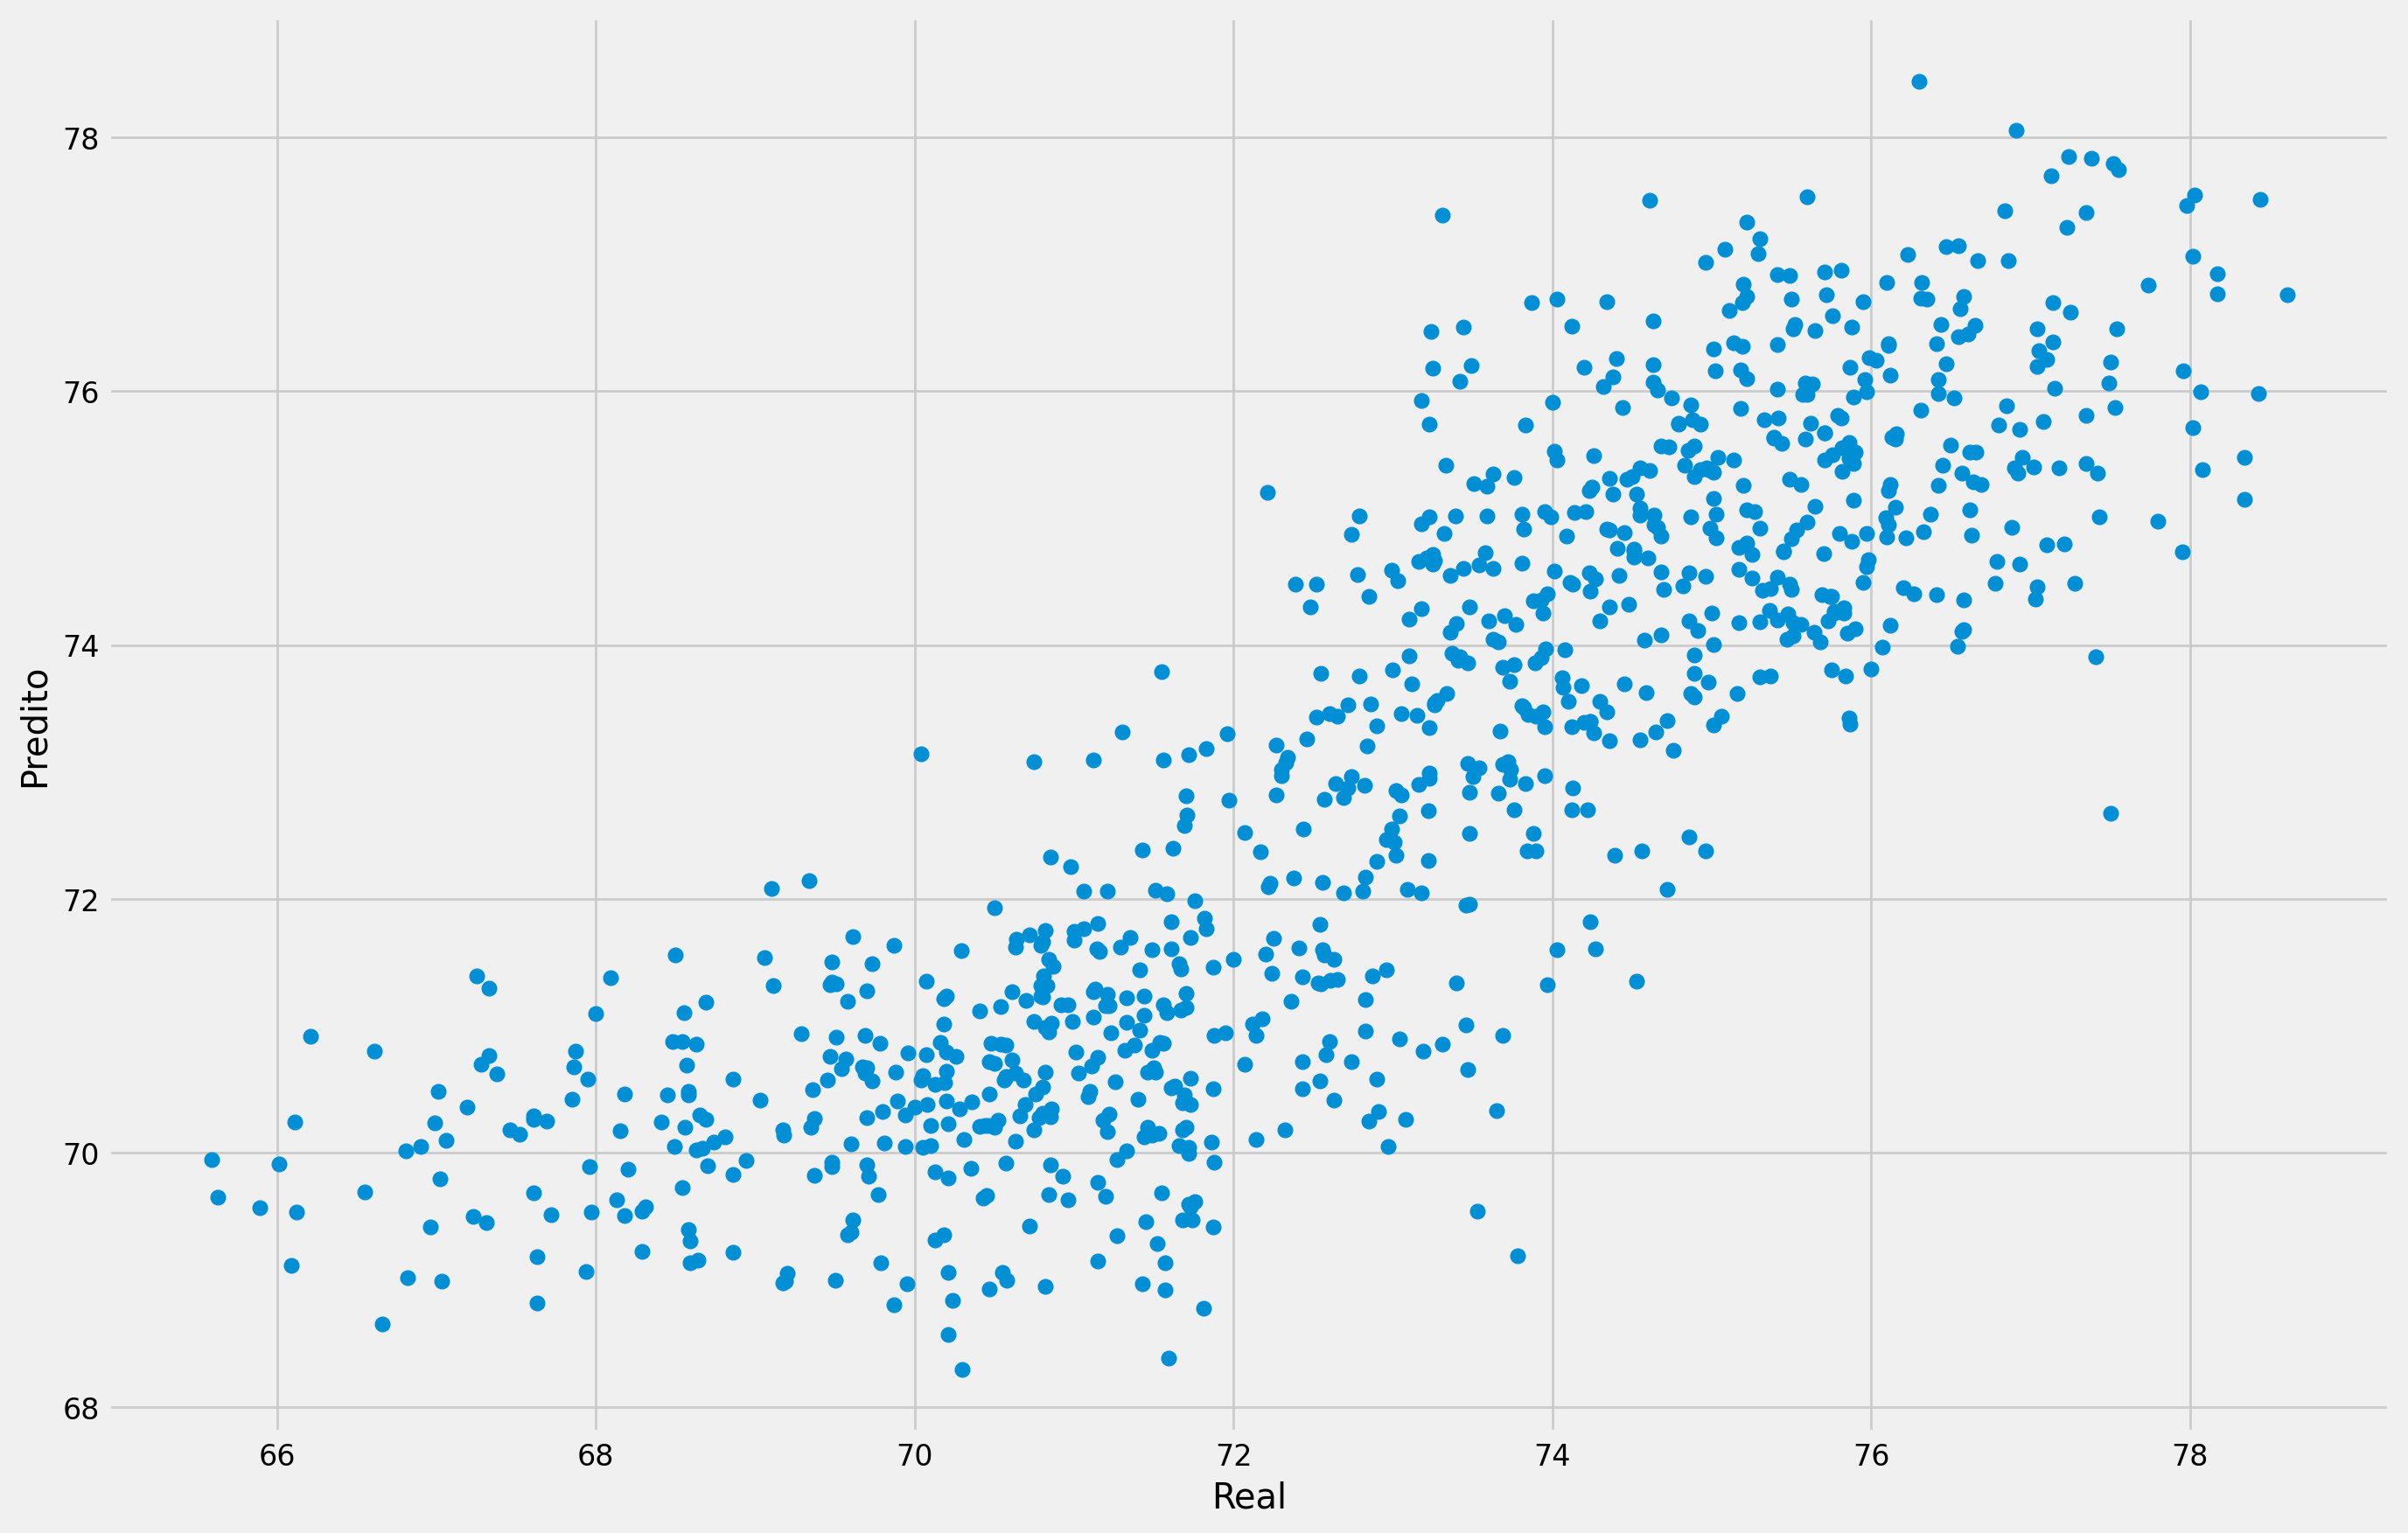

In [32]:
# Apresentação do grafico real x preditivo
plt.figure(figsize = (15,10))
plt.scatter(teste_y, y_pred)
plt.xlabel("Real")
plt.ylabel("Predito")
plt.show()

# REGRESSÃO RIDGE


O modelo é definido pelo Scklearn Ridge

In [33]:
# Importando as funções Ridge e RidgeCV
from sklearn.linear_model import RidgeCV, Ridge

In [34]:
# Gerando valores para Alpha
# Linspace cria uma sequencia denumeros uniformemente espaçados entre os limites dados
alphas = 10**np.linspace(-10,5,200)
alphas

array([1.00000000e-10, 1.18953407e-10, 1.41499130e-10, 1.68318035e-10,
       2.00220037e-10, 2.38168555e-10, 2.83309610e-10, 3.37006433e-10,
       4.00880633e-10, 4.76861170e-10, 5.67242607e-10, 6.74754405e-10,
       8.02643352e-10, 9.54771611e-10, 1.13573336e-09, 1.35099352e-09,
       1.60705282e-09, 1.91164408e-09, 2.27396575e-09, 2.70495973e-09,
       3.21764175e-09, 3.82749448e-09, 4.55293507e-09, 5.41587138e-09,
       6.44236351e-09, 7.66341087e-09, 9.11588830e-09, 1.08436597e-08,
       1.28989026e-08, 1.53436841e-08, 1.82518349e-08, 2.17111795e-08,
       2.58261876e-08, 3.07211300e-08, 3.65438307e-08, 4.34701316e-08,
       5.17092024e-08, 6.15098579e-08, 7.31680714e-08, 8.70359136e-08,
       1.03532184e-07, 1.23155060e-07, 1.46497140e-07, 1.74263339e-07,
       2.07292178e-07, 2.46581108e-07, 2.93316628e-07, 3.48910121e-07,
       4.15040476e-07, 4.93704785e-07, 5.87278661e-07, 6.98587975e-07,
       8.30994195e-07, 9.88495905e-07, 1.17584955e-06, 1.39871310e-06,
      

In [37]:
# Criando o modelo de Regressão Ridge
ridge = Ridge()
coefs = []
scores = np.empty_like(alphas)

for i,a in enumerate(alphas):

  # Definir o valor de alpha:
  ridge.set_params(alpha = a, fit_intercept=True)

  # Fazendo o ajuste do modelo aos dados:
  ridge.fit(treino_x, treino_y)
  coefs.append(ridge.coef_)
  y_pred = ridge.predict(teste_x)

  # Verificando o desempenho sob o conjunto de teste:
  scores[i] = np.sqrt(mean_squared_error(teste_y, y_pred))


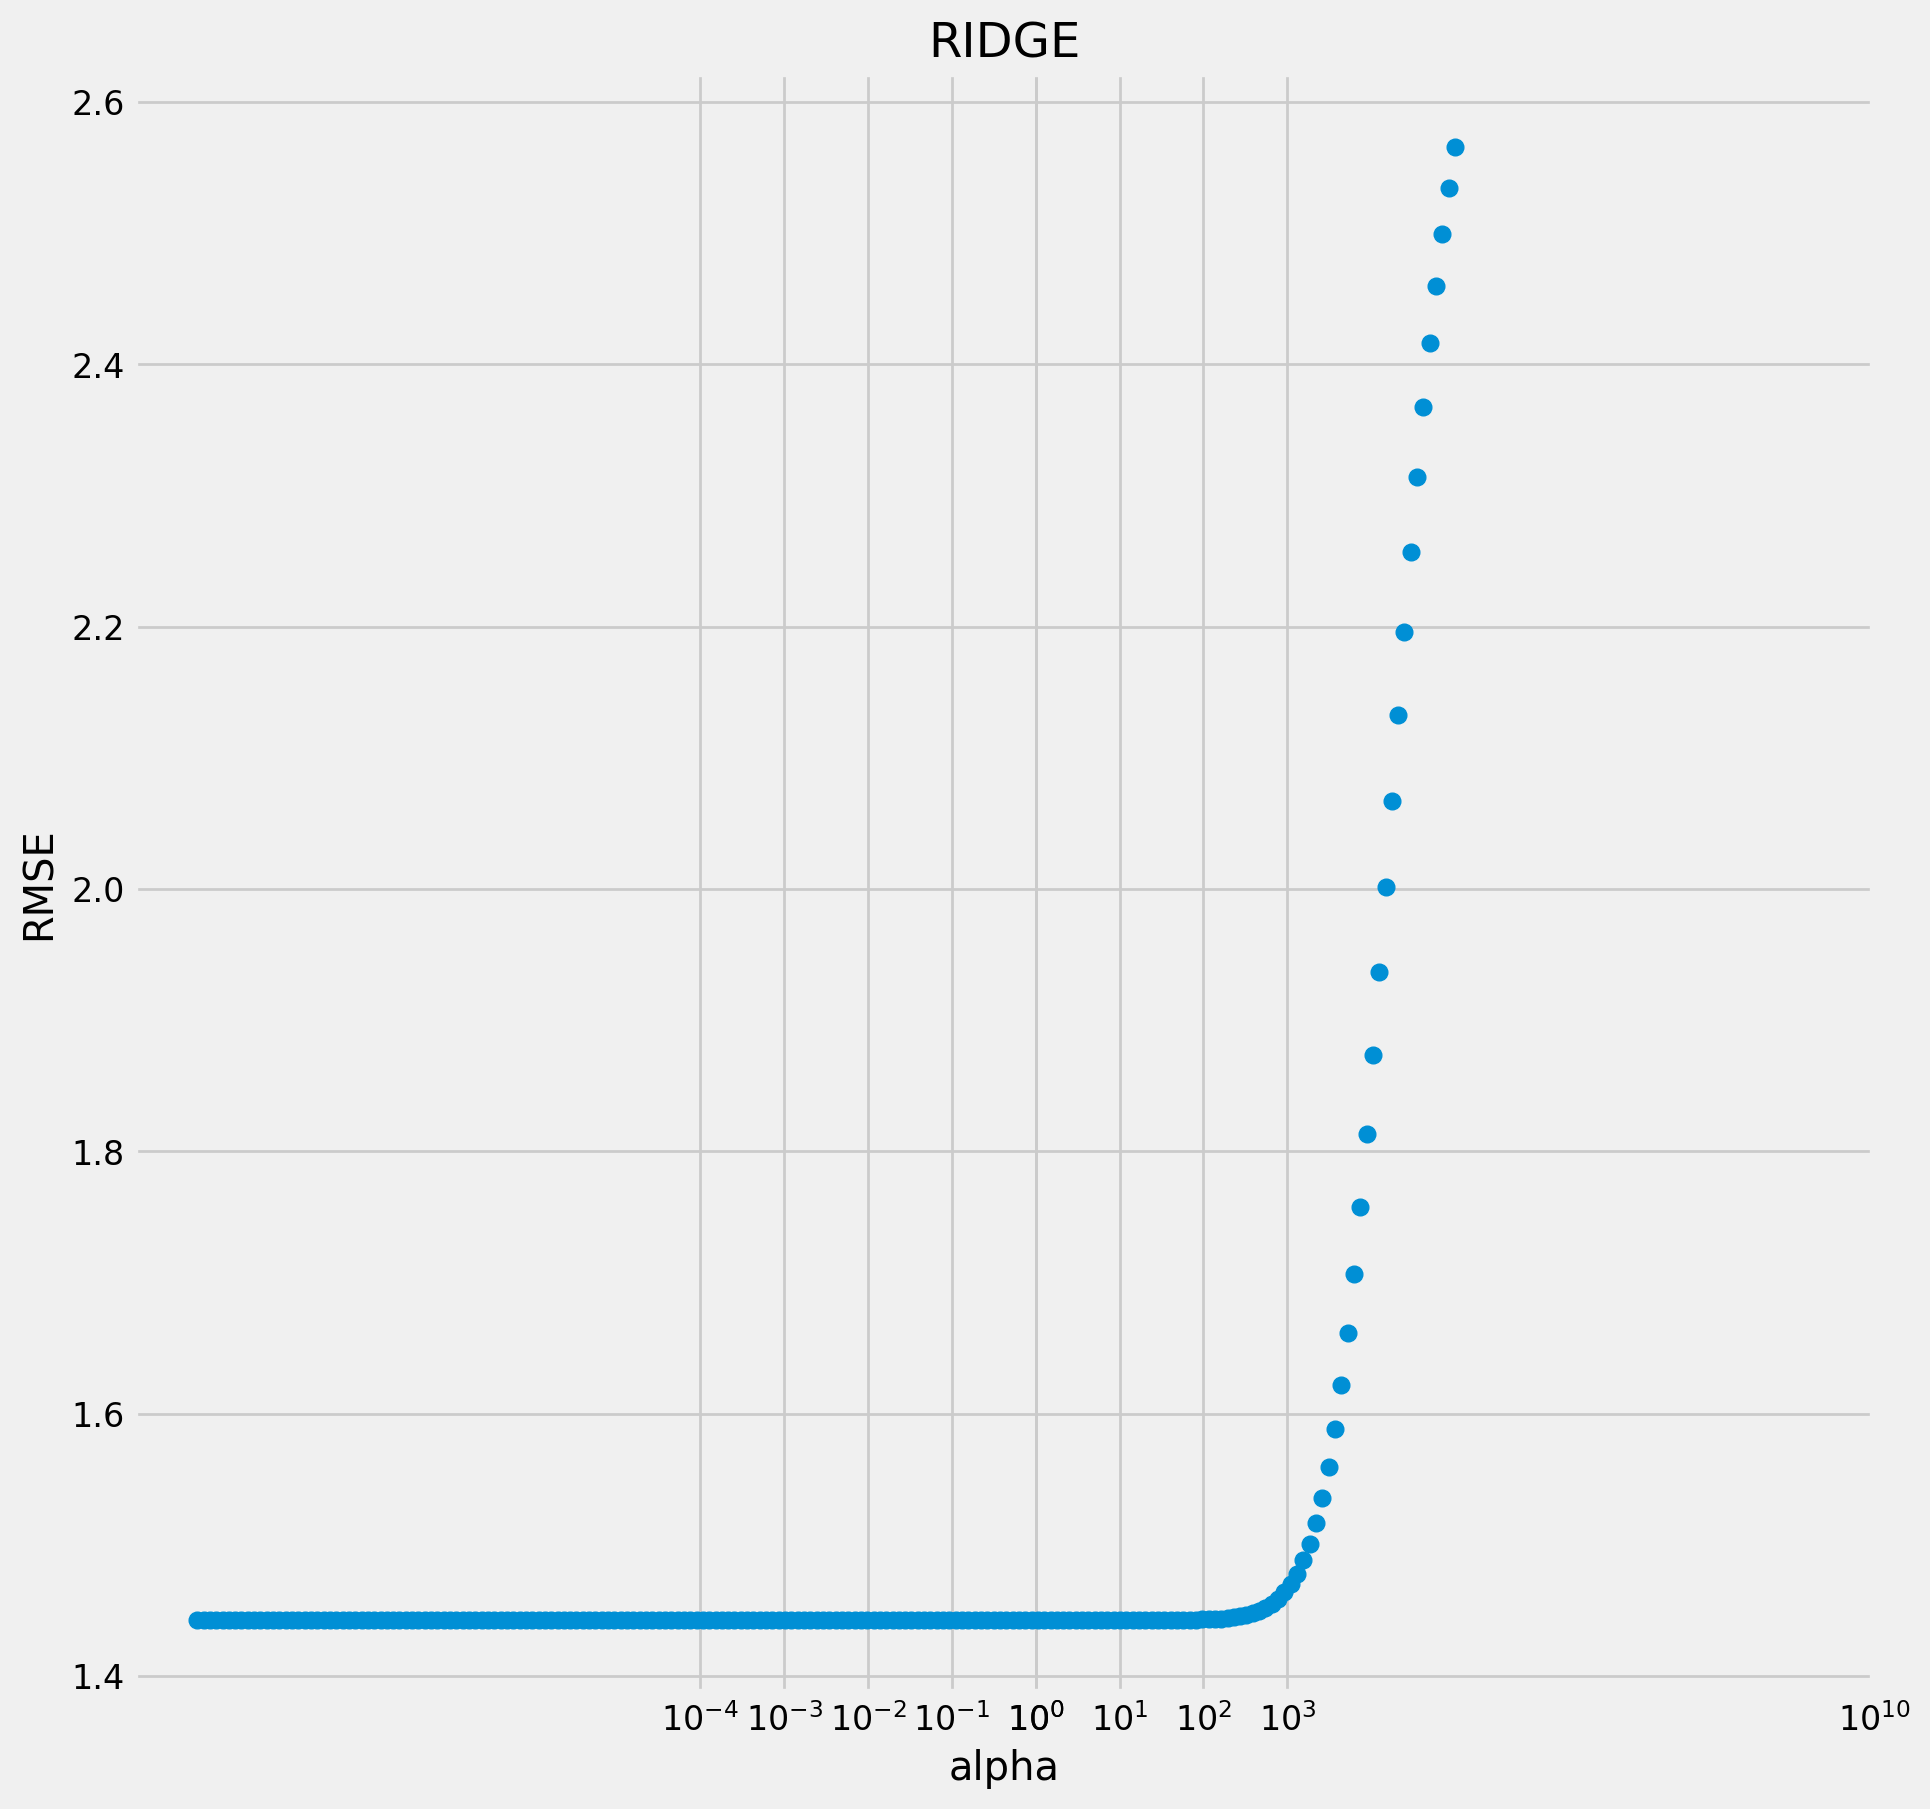

In [43]:
# Visualizando o RMSE em função do alpha:
plt.figure(figsize=(10,10))
plt.scatter(alphas, scores)
plt.ylabel("RMSE")
plt.xlabel("alpha")
plt.xscale("log")
plt.title("RIDGE")
plt.xticks([1e-4, 1e-3, 1e-2, 1e-1, 1e-0, 1, 1e1, 1e2, 1e3, 1e10])
plt.show()

In [47]:
# Função para verificar o peso dos coeficientes em função do Alpha:
def weight_versus_alpha_plot(weight, alphas, features):
  fig = plt.figure(figsize = (15,10))
  weight = np.array(weight)

  for col in range(weight.shape[2]):
    plt.plot(alphas, weight[:, :, col], label = features[col])

  plt.axhline(0, color = 'black', linestyle = "--", linewidth = 3)
  plt.legend(bbox_to_anchor = (1.3, 0.9))
  plt.title("Coeficiente entre Alpha Grows - Ridge")
  plt.ylabel("Coeficiente Weight")
  plt.xlabel("Alpha")
  plt.xscale("log")

  return fig

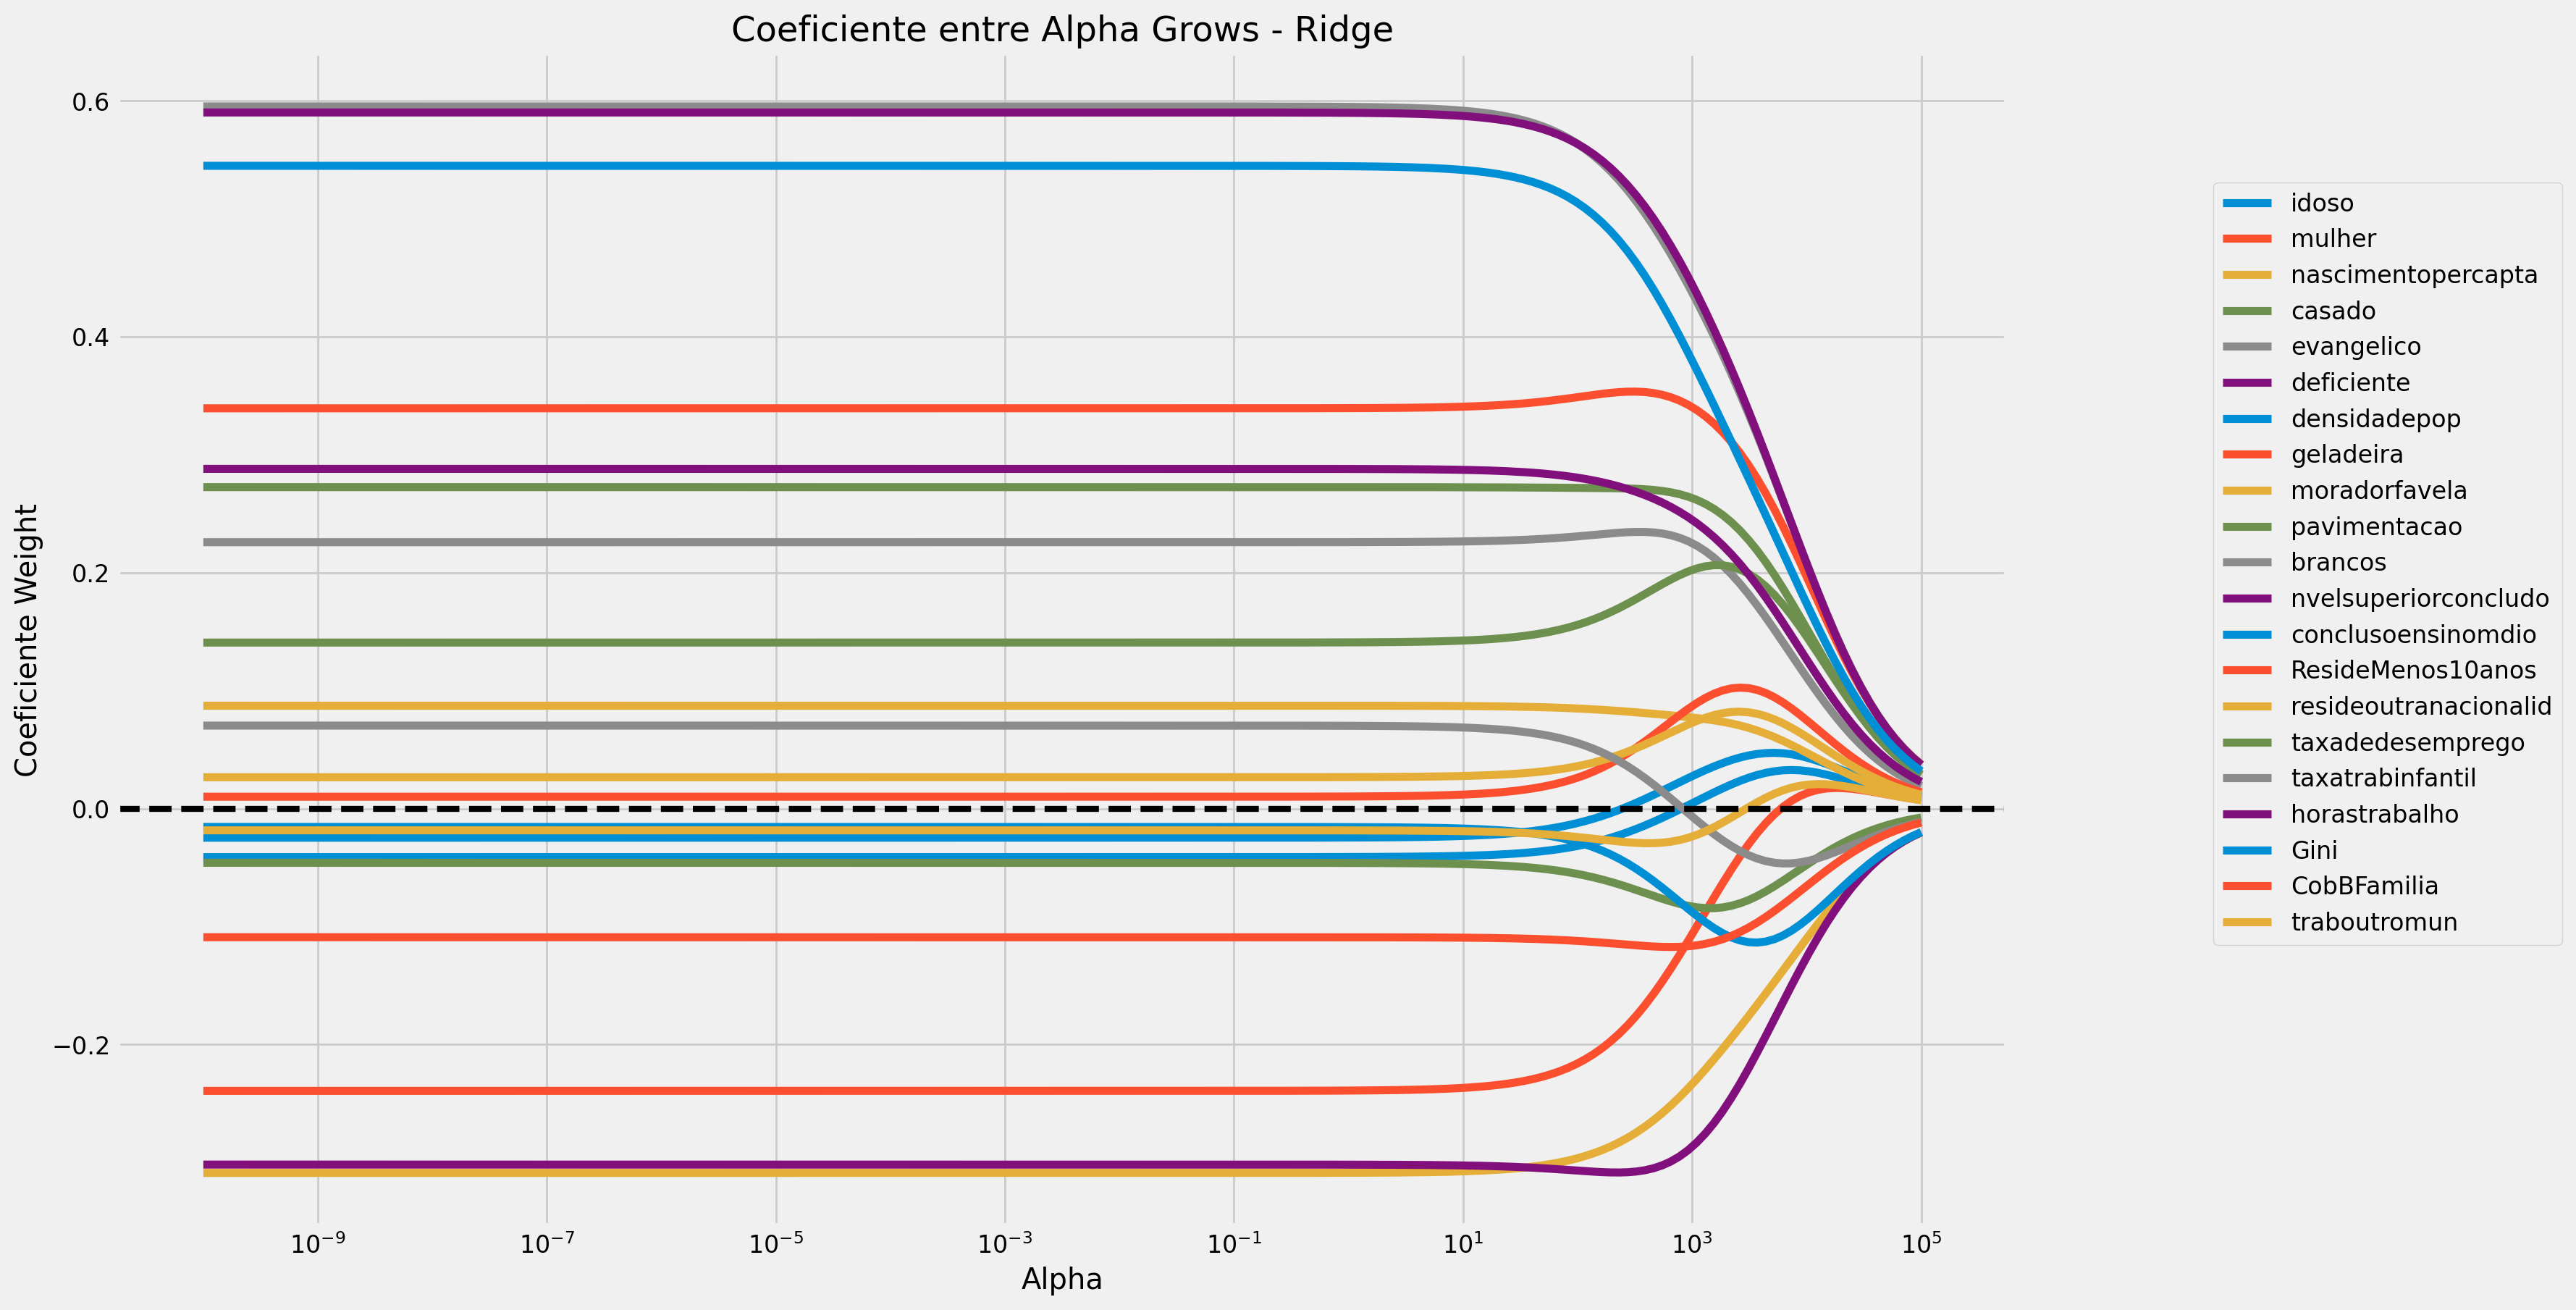

In [48]:
ridge_fig = weight_versus_alpha_plot(coefs, alphas, list(treino_x.columns))

# REGRESSAO LASSO


In [49]:
# Importando o modelo Lasso e sua variante LassoCV
from sklearn.linear_model import Lasso, LassoCV



In [50]:
alphas = 10**np.linspace(-10,5,200)

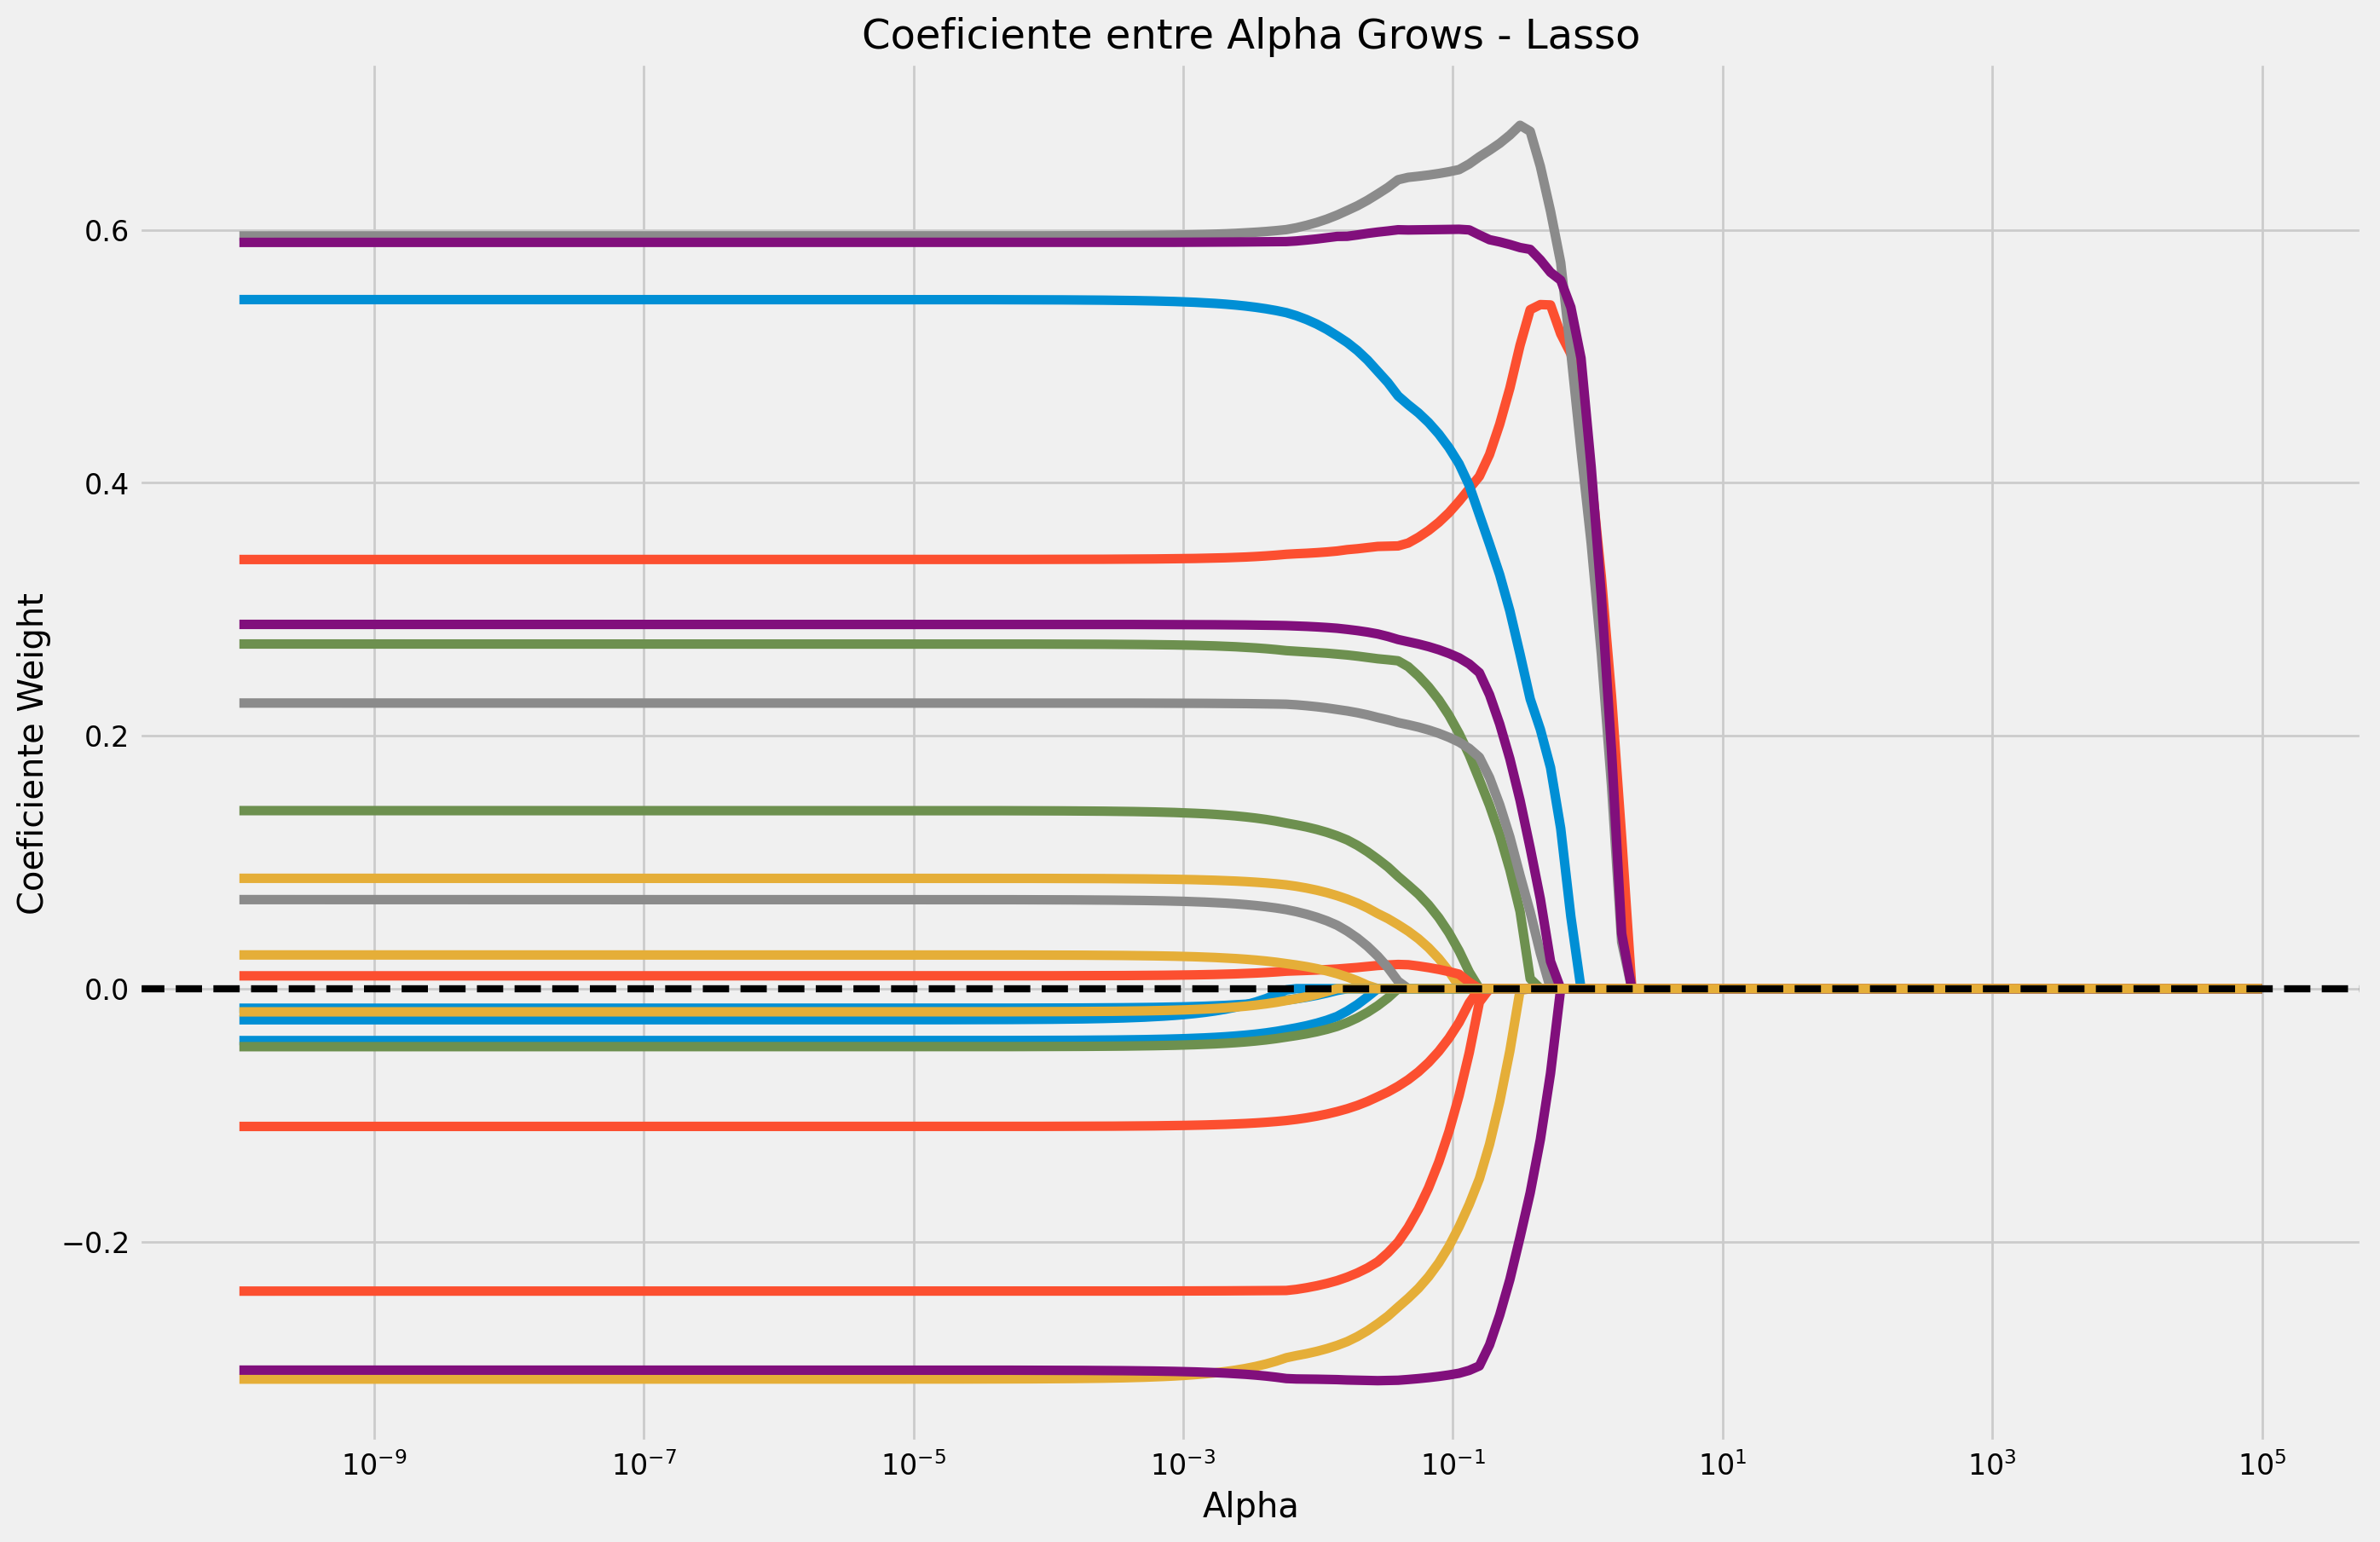

In [51]:
lasso = Lasso()
coefs = []
scores = np.empty_like(alphas)

for i,a in enumerate(alphas):
  lasso.set_params(alpha = a, fit_intercept=True)
  lasso.fit(treino_x, treino_y)
  coefs.append(lasso.coef_)
  y_pred = lasso.predict(teste_x)
  scores[i] = np.sqrt(mean_squared_error(teste_y, y_pred))

fig = plt.figure(figsize = (15,10))
ax = plt.gca()
ax.plot(alphas, coefs)
plt.axhline(0, color = 'black', linestyle = "--", linewidth = 3)
ax.set_xscale('log')
plt.axis('tight')
plt.title("Coeficiente entre Alpha Grows - Lasso")
plt.ylabel("Coeficiente Weight")
plt.xlabel("Alpha")
plt.show()

([<matplotlib.axis.XTick at 0x7ee549649330>,
 [Text(0.0001, 0, '$\\mathdefault{10^{-4}}$'),
  Text(0.001, 0, '$\\mathdefault{10^{-3}}$'),
  Text(0.01, 0, '$\\mathdefault{10^{-2}}$'),
  Text(0.1, 0, '$\\mathdefault{10^{-1}}$'),
  Text(1.0, 0, '$\\mathdefault{10^{0}}$'),
  Text(1.0, 0, '$\\mathdefault{10^{0}}$'),
  Text(10.0, 0, '$\\mathdefault{10^{1}}$'),
  Text(100.0, 0, '$\\mathdefault{10^{2}}$'),
  Text(1000.0, 0, '$\\mathdefault{10^{3}}$'),
  Text(10000000000.0, 0, '$\\mathdefault{10^{10}}$')])

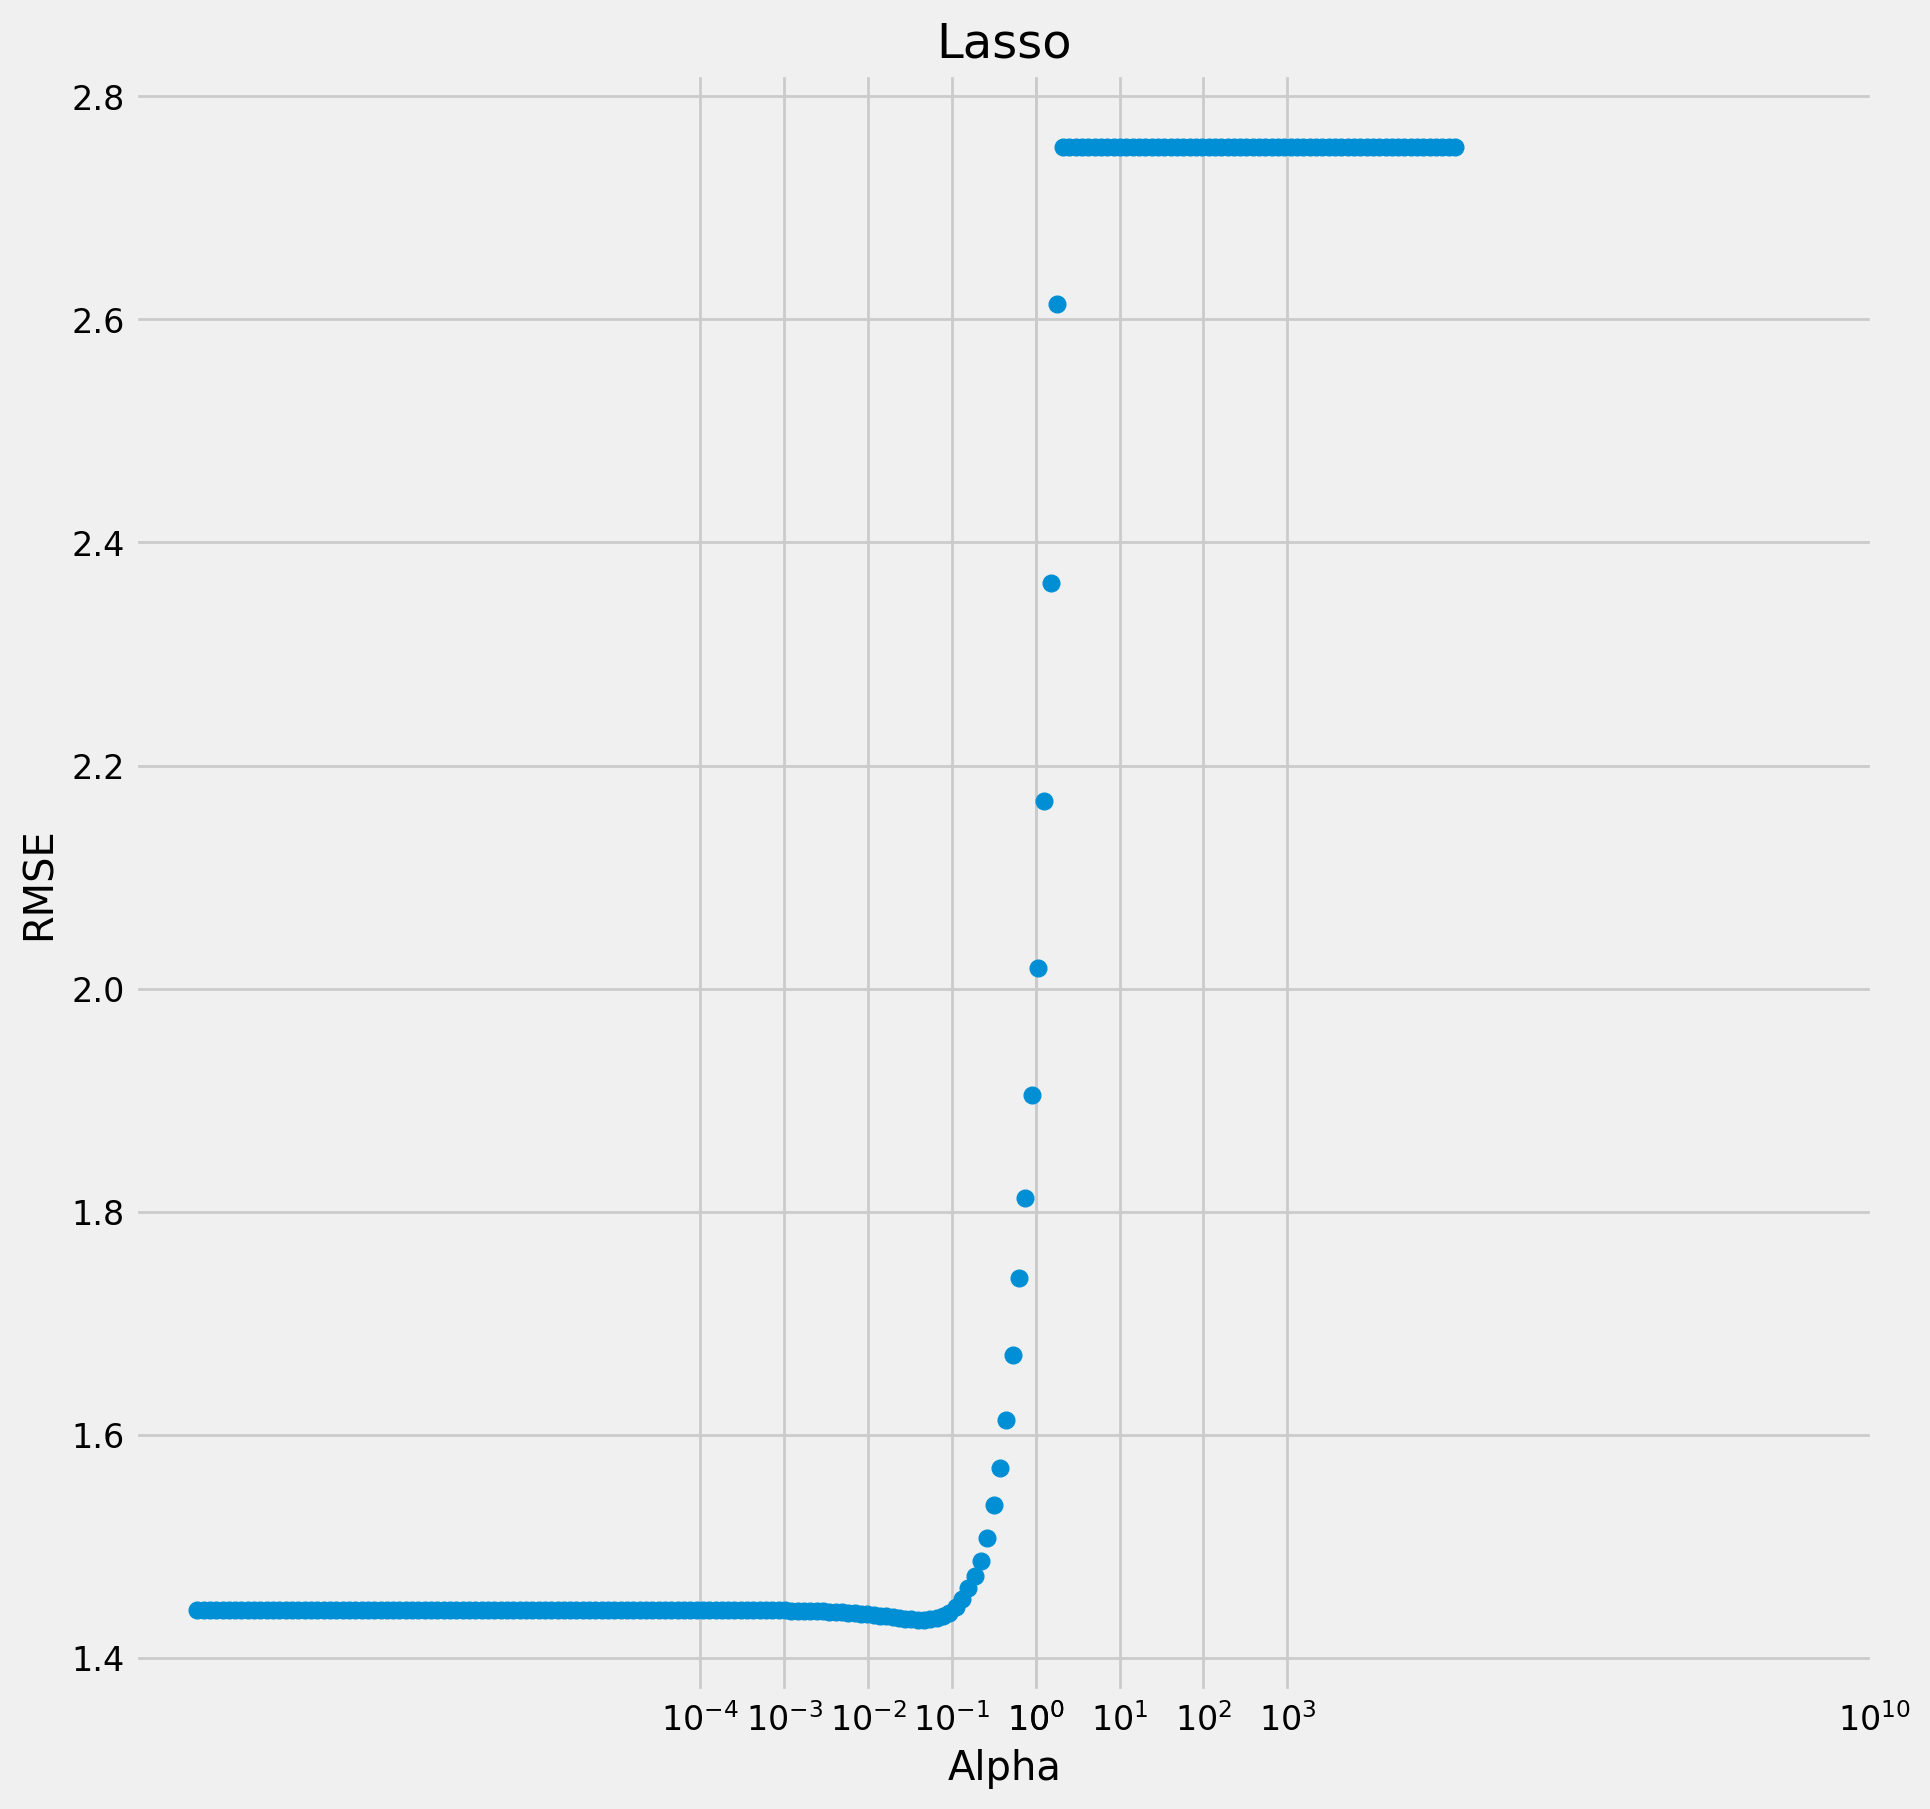

In [52]:
# RMSE em função do Alpha:
plt.figure(figsize=(10,10))
plt.scatter(alphas, scores)
plt.ylabel("RMSE")
plt.xlabel("Alpha")
plt.xscale('log')
plt.title("Lasso")
plt.xticks([1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1, 1e1, 1e2, 1e3, 1e10])